In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
# See:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# You can also just do this in Colab/Jupyter, some "magic":
# %config InlineBackend.figure_format='retina'

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
# need to run these commands the very first time you use these packages
# nltk.download('stopwords') 
# nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('finalnewsdataprocessed.csv')
df_final = df[['Source', 
               'Source Bias', 
               'Author', 
               'Title', 
               'Overall Sentiment',
               'compound score', 
               'negative score', 
               'positive score', 
               'neutral score']]
df_final.sort_values(by='Source')

,Source,Source Bias,Author,Title,Overall Sentiment,compound score,negative score,positive score,neutral score
1476,Al Jazeera English,-4.4,Tanvir Chowdhury,Rohingya crisis: Relocation plan meets opposition,-1,-0.6249,0.451,0.000,0.549
1160,Al Jazeera English,-4.4,Al Jazeera,"After France refused rescue ship to dock, refu...",1,0.2960,0.162,0.324,0.515
1159,Al Jazeera English,-4.4,Al Jazeera,A Place of Refuge: Malmo and Nickelsdorf,0,0.0000,0.000,0.000,1.000
733,Al Jazeera English,-4.4,Jihan Abdalla,Muslim American votes may carry outsize weight...,0,0.0000,0.000,0.000,1.000
734,Al Jazeera English,-4.4,Laurin-Whitney Gottbrath,Pandemic exacerbates barriers to voting for ho...,0,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...
172,USA Today,-1.3,"USA TODAY, Ledyard King and Phillip M. Bailey,...","'Anxious, fearful, angry.' At 50 days out to E...",-1,-0.4939,0.151,0.000,0.849
173,USA Today,-1.3,"USA TODAY, Donovan Slack, USA TODAY",Trump appointees torpedo report on voting acce...,0,0.0000,0.000,0.000,1.000
174,USA Today,-1.3,"USA TODAY, Sarah Spicer, Opinion contributor",Vulnerable Kansas bird populations are a canar...,-1,-0.2263,0.147,0.000,0.853
167,USA Today,-1.3,"USA TODAY, Suzette Hackney, USA TODAY",Honor Justice Ruth Bader Ginsburg by registeri...,1,0.7650,0.000,0.398,0.602


In [3]:
# Total number of headlines in the dataset
df['Title'].count()

1477

In [4]:
# Set style for all graphs
plt.style.use('fivethirtyeight')

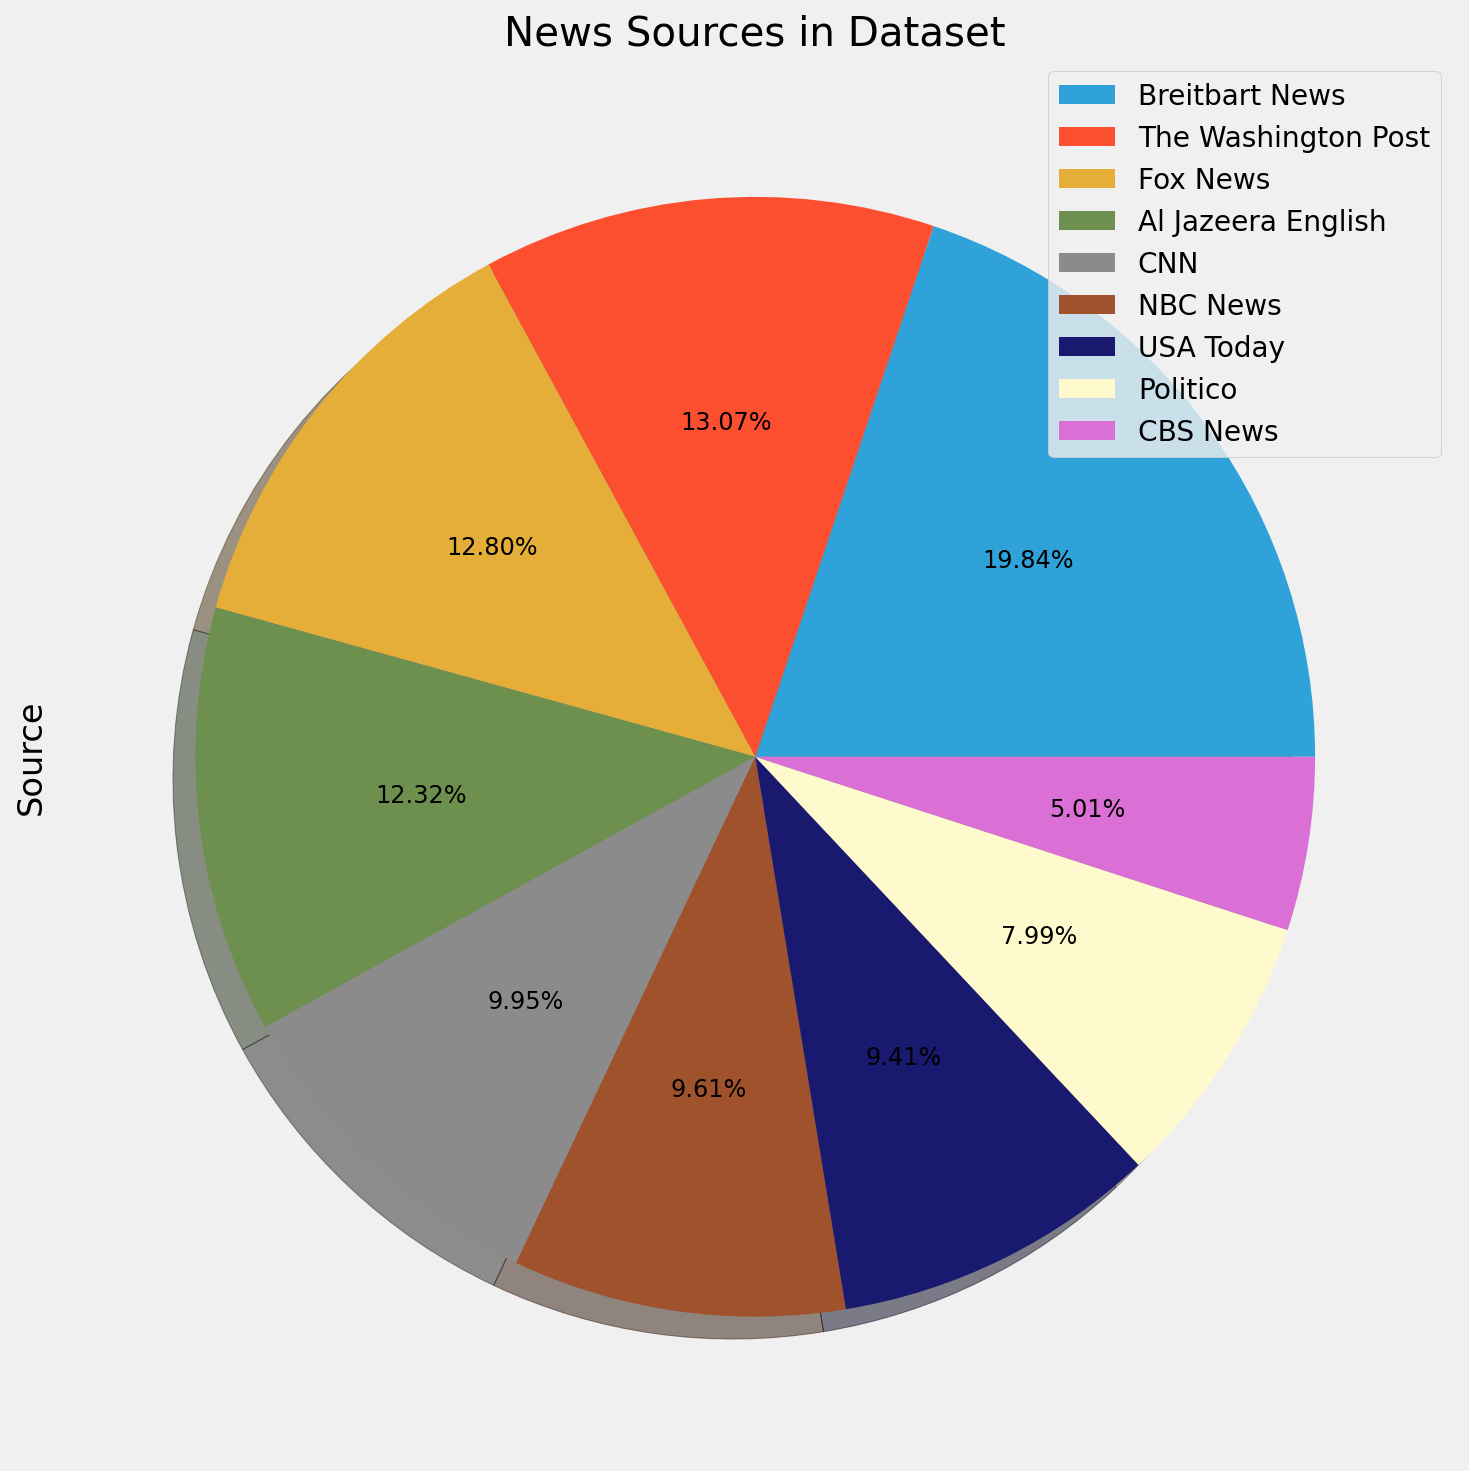

In [5]:
# Pie chart of news sources in dataset
colors = ['#30A2DA', '#FC4F30', '#E5AE38', '#6D904F', '#8B8B8B', 'sienna', 'midnightblue', 'lemonchiffon', 'orchid']
pie = df['Source'].value_counts().plot.pie(autopct='%.2f%%', fontsize=12, figsize=(12, 12), labeldistance=None, legend=True, shadow=True, title='News Sources in Dataset', colors=colors)
pie
plt.show()


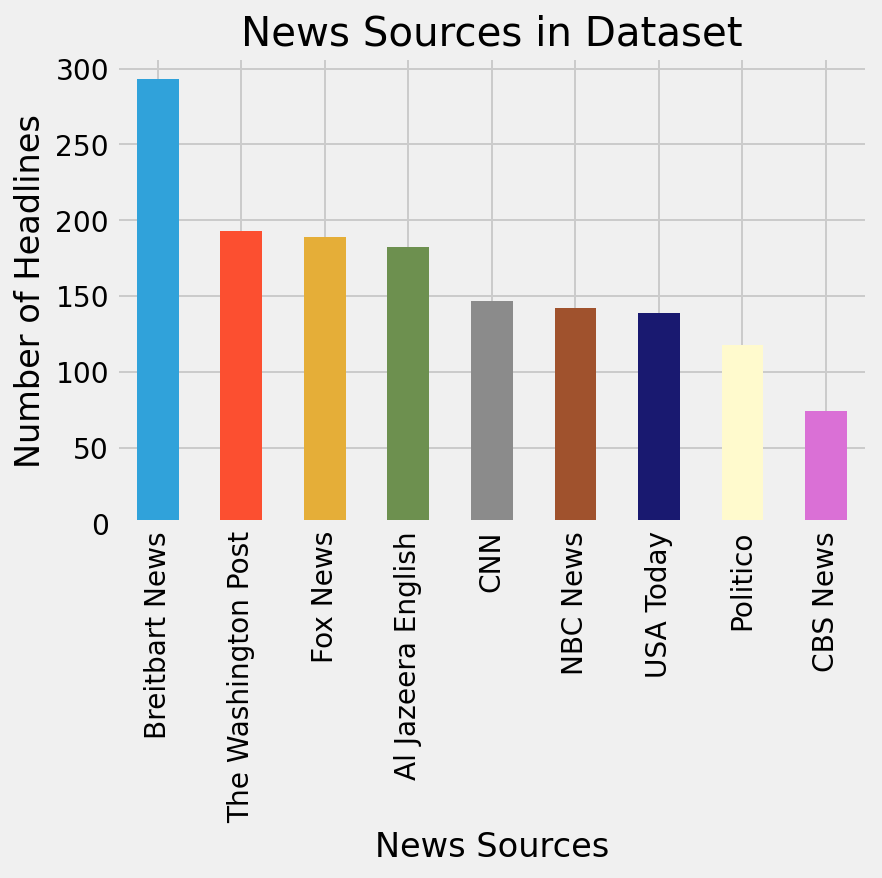

In [6]:
# Bar graph of news sources in data set
# in presentation
df['Source'].value_counts().plot.bar(color = colors)
plt.title('News Sources in Dataset')
plt.xlabel('News Sources')
plt.ylabel('Number of Headlines')
plt.savefig('../images/newssourcesindataset.png')
plt.show()


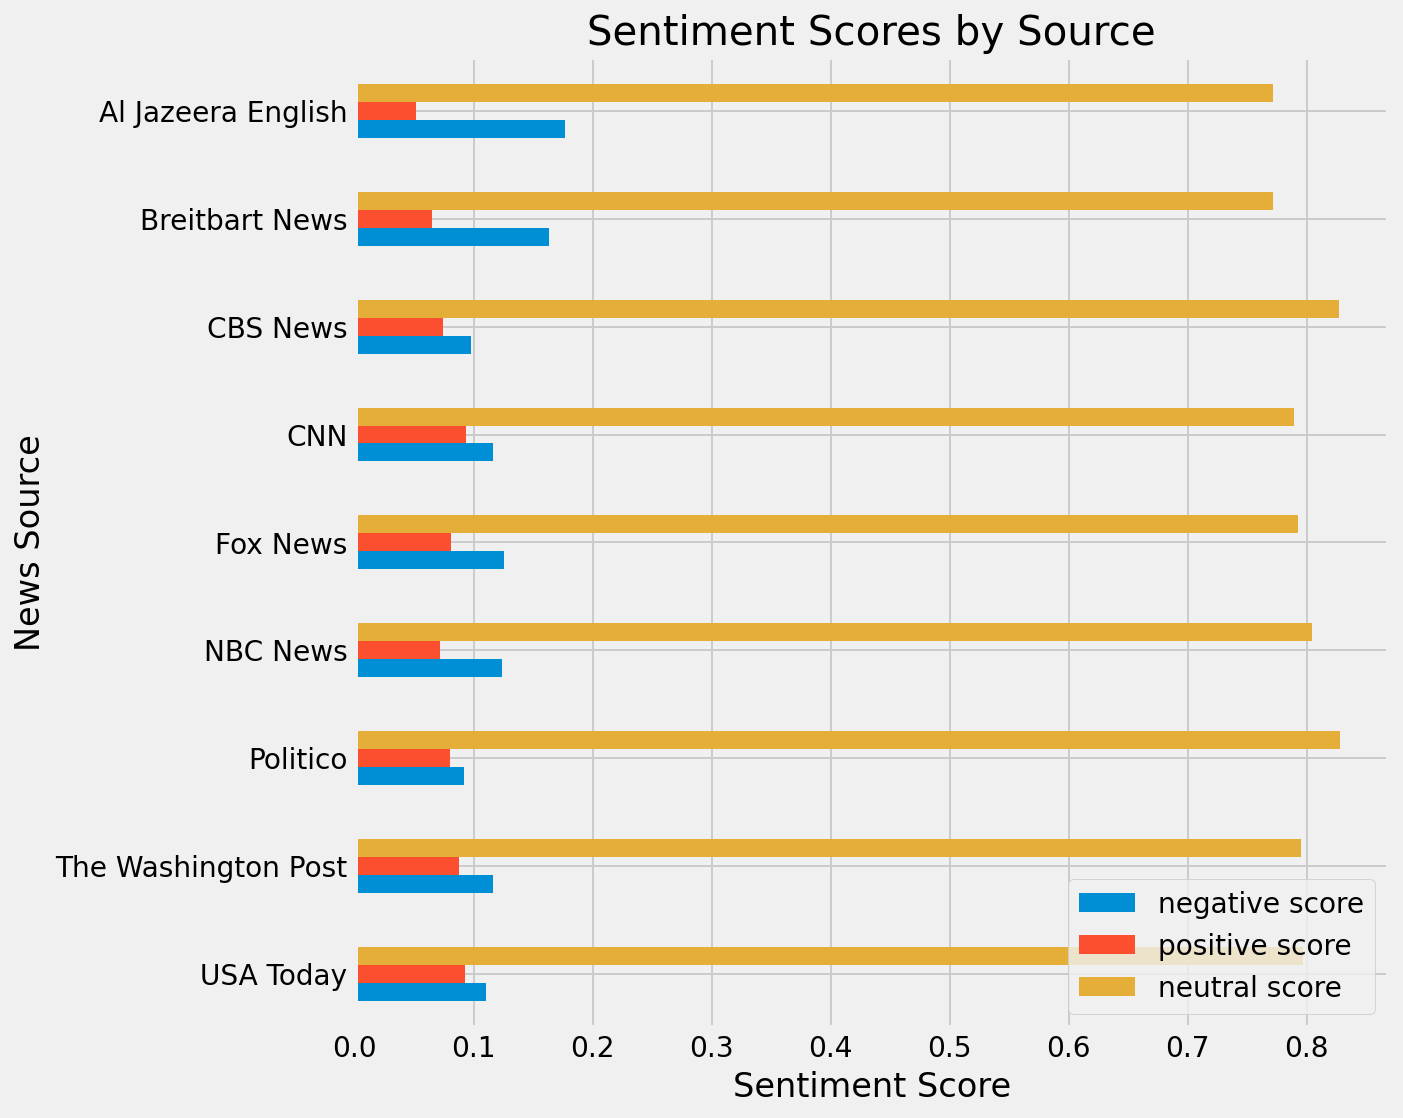

In [7]:
# Bar graph of composite sentiment scores by source
df[['Source', 'negative score', 'positive score', 'neutral score']].groupby('Source').mean().sort_values(by='Source', ascending=False).plot.barh(figsize=(10, 8), title = 'Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()
scores = df.groupby('Source').mean()


In [ ]:
# Bar graph of positive and negative sentiment scores by source
df[['Source', 'positive score', 'negative score']].groupby('Source').mean().sort_values(by='Source', ascending=False).plot.barh(figsize=(10, 8), title = 'Positive and Negative Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()
scores = df.groupby('Source').mean()

In [ ]:
# Bar graph of compound sentiment scores by source
# Possibly
scores['compound score'].plot.barh(title='Compound Sentiment Scores by News Source', color='#6D904F')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [ ]:
# Bar graph of positive sentiment scores by source 
scores['positive score'].plot.barh(color='#30A2DA', title='Positive Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [ ]:
# Bar graph of negative sentiment score by source
scores['negative score'].plot.barh(color='#FC4F30', title='Negative Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [ ]:
# Bar graph of neutral sentiment score by source
scores['neutral score'].plot.barh(color='#E5AE38', title='Neutral Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [ ]:
# Average sentiment scores
scores

In [ ]:
# Calculate mean compound score 
mean_compound = df['compound score'].mean()
print(f'The average compound sentiment score is {mean_compound:.2f}.')

In [ ]:
# Box plot of average compound score
scores['compound score'].plot.box(title='Box Plot of Compound Sentiment Scores')

plt.show()

In [ ]:
# Create line of political bias scores


In [ ]:
# Boxplot of compound scores by news sources
df.boxplot(column='compound score', by='Source', figsize=(10, 10)) 
plt.xticks(rotation='vertical')
plt.title('Boxplot of Compound Score by News Source')
plt.xlabel('News Sources')
plt.ylabel('Sentiment Score')
plt.savefig('../images/boxplotaveragecompoundscores.png')
plt.show()

In [ ]:
df_sentiments = df.copy()
for index, row in df_sentiments.iterrows():
    sentiment = row['Overall Sentiment']
    if sentiment == -1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Negative'
    if sentiment == 0:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Neutral'
    if sentiment == 1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Positive'
        
df_sentiments

In [ ]:
# Bar graph of sentiment labels by news source
sentiments_grouped = df_sentiments[['Source', 'Overall Sentiment', 'Title']].groupby(['Source', 'Overall Sentiment']).count()
sentiments = sentiments_grouped.reset_index()
sentiments

In [ ]:
# Create new dataframe of number of headlines with each overall sentiment by source 
sentiment_new = pd.pivot_table(sentiments, index='Source', columns='Overall Sentiment', values ='Title')
sentiment_new

In [ ]:
# Bar graph of number of sentiment score types by source
# Use in presentation, customize colors
colors = ['#fc4f30', '#e5ae38', '#30a2da']
sentiment_new.plot.barh(figsize=(10, 8), title = 'Overall Sentiments of Headlines by Source', color=colors)
plt.xlabel('Number of Headlines per Sentiment Category')
plt.ylabel('News Source')
plt.savefig('../images/headlinesentimentscount.png')
plt.tight_layout()

In [ ]:
def process_corpus(titles):
    tokens = []
    for title in titles:
        tokenizer = RegexpTokenizer(r'\w+')
        toks = tokenizer.tokenize(title)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [ ]:
# Determine most frequent words in all headlines
headlines = list(df['Title'])
headlines_tokens = process_corpus(headlines)
headlines_freq = nltk.FreqDist(headlines_tokens)
top_terms_all = headlines_freq.most_common(20)
top_terms_all

In [ ]:
# Graph top 5 terms in all headlines
terms = []
counts = []
for value in range (0,5):
    term = top_terms_all[value][0]
    count = top_terms_all[value][1]
    terms.append(term)
    counts.append(count)
    
plt.bar(terms, counts, color='#30A2DA')
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Headlines')
plt.show()


    

In [ ]:
# Determine most frequent words in positive headlines
pos_headlines = list(df.loc[df['Overall Sentiment']==1]['Title'])
pos_headlines_tokens = process_corpus(pos_headlines)
pos_headlines_freq = nltk.FreqDist(pos_headlines_tokens)
top_terms_pos = pos_headlines_freq.most_common(20)
top_terms_pos

In [ ]:
# Graph top 5 terms in positive headlines
terms_pos = []
counts_pos = []
for value in range (0,5):
    term = top_terms_pos[value][0]
    count = top_terms_pos[value][1]
    terms_pos.append(term)
    counts_pos.append(count)
    
plt.bar(terms_pos, counts_pos, color='#E5AE38')
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Positive Headlines')
plt.savefig('../images/frequenttermspositive.png')
plt.show()

In [ ]:
# Determine most frequent words in negative headlines
neg_headlines = list(df.loc[df['Overall Sentiment']==-1]['Title'])
neg_headlines_tokens = process_corpus(neg_headlines)
neg_headlines_freq = nltk.FreqDist(neg_headlines_tokens)
top_terms_neg = neg_headlines_freq.most_common(20)
top_terms_neg

In [ ]:
# Graph top 5 terms in negative headlines
terms_neg = []
counts_neg = []
for value in range (0,5):
    term = top_terms_neg[value][0]
    count = top_terms_neg[value][1]
    terms_neg.append(term)
    counts_neg.append(count)
    
plt.bar(terms_neg, counts_neg, color='r')
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Negative Headlines')
plt.savefig('../images/frequenttermsnegative.png')
plt.show()

In [ ]:
# Function which creates a fancy word cloud
def wordcloud_draw(data, color, _type):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(f'../images/wordcloud{_type}.png')
    plt.show()

In [ ]:
# Prettier word cloud of positive headlines
# in presentation
wordcloud_draw(pos_headlines,'black', 'positive')

In [ ]:
# Prettier word cloud of negative headlines
# in presentation
wordcloud_draw(neg_headlines, 'black', 'negative')

In [ ]:
# Prettier word cloud of all headlines
# use as title slide
wordcloud_draw(headlines,'black', 'allblack')

In [ ]:
# Prettier word cloud of all headlines
wordcloud_draw(headlines,'white', 'allwhite')